In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, List, Optional, Dict
import seaborn as sns
import warnings

warnings.simplefilter('ignore', np.RankWarning)
%matplotlib inline

In [2]:
DATA_DIR = '../../data/database/database/signals'
META_FILE = '../meta.csv'
RESULTS_DIR = '../../output/pics'
FEATURES_FILE = '../data/FHR_features_18.csv'

In [8]:
df_train = pd.read_csv(META_FILE)
df_train = df_train.drop(['Unnamed: 0'], axis = 1)
patients = df_train['patient'].values
df_train.head(10)

,patient,pH,BDecf,pCO2,BE,Apgar1,Apgar5,Gest. weeks,Weight(g),Sex,...,Induced,I.stage,NoProgress,CK/KP,II.stage,Deliv. type,dbID,Rec. type,Pos. II.st.,target
0,1220,7.30,3.52,6.0,-4.7,9.0,10.0,42.0,3100.0,2.0,...,1.0,165.0,0.0,0.0,15.0,1.0,1051632.0,2.0,14400.0,0
1,1234,7.29,2.50,6.5,-4.2,8.0,9.0,41.0,3200.0,1.0,...,0.0,135.0,0.0,0.0,10.0,1.0,1054195.0,1.0,14400.0,0
2,1208,7.23,5.84,6.6,-7.4,9.0,9.0,40.0,3900.0,2.0,...,0.0,260.0,0.0,0.0,30.0,1.0,1049536.0,12.0,14400.0,0
3,1038,7.33,2.72,5.7,-4.0,10.0,10.0,39.0,2740.0,1.0,...,0.0,15.0,0.0,0.0,10.0,1.0,1002508.0,1.0,14400.0,0
4,1004,7.30,5.19,5.5,-6.4,8.0,9.0,41.0,3370.0,1.0,...,1.0,55.0,0.0,0.0,10.0,1.0,983277.0,12.0,14400.0,0
5,1010,7.35,5.20,4.7,-5.9,8.0,9.0,38.0,2670.0,1.0,...,1.0,105.0,0.0,0.0,10.0,1.0,985296.0,12.0,14400.0,0
6,1022,7.28,1.53,7.0,-3.0,10.0,10.0,39.0,3580.0,1.0,...,1.0,10.0,0.0,0.0,5.0,1.0,992640.0,12.0,14400.0,0
7,1036,7.08,8.11,9.3,-11.2,8.0,9.0,40.0,3310.0,2.0,...,0.0,175.0,0.0,0.0,10.0,1.0,1000559.0,2.0,14400.0,2
8,2041,7.37,3.69,4.8,-3.1,9.0,9.0,41.0,4040.0,1.0,...,0.0,515.0,1.0,0.0,-1.0,2.0,1072043.0,1.0,-1.0,0
9,1206,7.24,2.06,7.7,-4.0,9.0,10.0,41.0,3250.0,2.0,...,0.0,276.0,0.0,0.0,15.0,1.0,1049205.0,1.0,14400.0,0


In [9]:
df_feat = pd.read_csv(FEATURES_FILE)
df_feat.head(10)


,patient,beta0,beta1,mean,LTV,STV,STD,MAD,#acc,#dec,Tstress,ApEn,SampEn,ApEn2,SampEn2,VLF,LF,HF,LF/HF,label
0,1002.0,167.914035,-0.003981,157.883028,14.286413,0.131994,10.629160,4.847439,1.0,2.0,89.50,0.057827,0.039360,0.046565,0.034232,63.376128,3.730200,0.001282,2908.791496,1.0
1,1003.0,121.826101,0.000220,122.381345,16.721753,0.127102,8.805417,3.967591,0.0,4.0,88.25,0.060722,0.042151,0.057512,0.044602,100.853039,1.384620,0.001916,722.798308,0.0
2,1004.0,125.818265,0.001942,130.709966,14.473389,0.131789,7.861146,3.538965,0.0,1.0,24.50,0.061608,0.036944,0.064241,0.043810,61.980538,4.234394,0.001872,2261.622857,0.0
3,1005.0,120.472282,-0.002568,114.002004,17.904278,0.140687,15.130069,5.098240,1.0,3.0,141.25,0.062679,0.050635,0.034596,0.030459,196.620426,1.693979,0.001777,953.128464,0.0
4,1007.0,112.772637,0.006563,129.308247,14.566404,0.135380,14.354716,3.453744,1.0,3.0,76.50,0.062905,0.034219,0.036014,0.023416,77.391508,4.634572,0.006747,686.901334,0.0
5,1008.0,121.660959,-0.001712,117.347337,23.327369,0.200406,12.207351,7.942357,5.0,4.0,80.75,0.096802,0.074026,0.060428,0.053624,136.666388,6.834328,0.004214,1621.778577,0.0
6,1010.0,129.356103,0.000037,129.449765,11.715591,0.111605,4.985122,2.596571,0.0,0.0,0.00,0.048884,0.037770,0.088820,0.073131,28.117248,2.082193,0.002539,820.034676,0.0
7,1011.0,116.483765,0.003413,125.082498,28.585095,0.216529,17.483692,11.153767,3.0,6.0,258.50,0.114072,0.088135,0.047464,0.044105,378.507364,8.080322,0.011696,690.868315,0.0
8,1013.0,134.324570,-0.001137,131.460219,16.384365,0.142254,10.395275,3.062198,3.0,1.0,59.00,0.060817,0.043082,0.051035,0.038304,116.096260,3.597719,0.002478,1451.993110,0.0
9,1014.0,133.469435,0.003718,142.836374,14.831510,0.126859,10.126789,5.242977,0.0,1.0,26.50,0.052536,0.043508,0.045659,0.039655,79.799197,1.760724,0.000968,1819.725278,0.0


In [35]:
df = pd.merge(df_train, df_feat, how='outer', on='patient', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [36]:
df.head(10)

,patient,pH,BDecf,pCO2,BE,Apgar1,Apgar5,Gest. weeks,Weight(g),Sex,...,Tstress,ApEn,SampEn,ApEn2,SampEn2,VLF,LF,HF,LF/HF,label
0,1001,7.14,8.14,7.7,-10.5,6.0,8.0,37.0,2660.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,7.00,7.92,12.0,-12.0,8.0,8.0,41.0,2900.0,2.0,...,89.50,0.057827,0.039360,0.046565,0.034232,63.376128,3.730200,0.001282,2908.791496,1.0
2,1003,7.20,3.03,8.3,-5.6,7.0,9.0,40.0,3770.0,1.0,...,88.25,0.060722,0.042151,0.057512,0.044602,100.853039,1.384620,0.001916,722.798308,0.0
3,1004,7.30,5.19,5.5,-6.4,8.0,9.0,41.0,3370.0,1.0,...,24.50,0.061608,0.036944,0.064241,0.043810,61.980538,4.234394,0.001872,2261.622857,0.0
4,1005,7.30,4.52,5.7,-5.8,9.0,10.0,41.0,3550.0,2.0,...,141.25,0.062679,0.050635,0.034596,0.030459,196.620426,1.693979,0.001777,953.128464,0.0
5,1006,7.23,1.29,8.2,-3.8,8.0,9.0,38.0,3500.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1007,7.16,4.35,8.8,-6.8,9.0,10.0,41.0,3220.0,2.0,...,76.50,0.062905,0.034219,0.036014,0.023416,77.391508,4.634572,0.006747,686.901334,0.0
7,1008,7.36,3.88,4.9,-4.6,8.0,9.0,39.0,3360.0,1.0,...,80.75,0.096802,0.074026,0.060428,0.053624,136.666388,6.834328,0.004214,1621.778577,0.0
8,1009,7.18,7.60,7.0,-9.6,8.0,9.0,39.0,2700.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1010,7.35,5.20,4.7,-5.9,8.0,9.0,38.0,2670.0,1.0,...,0.00,0.048884,0.037770,0.088820,0.073131,28.117248,2.082193,0.002539,820.034676,0.0


In [37]:
#check the colunms
df.columns

Index(['patient', 'pH', 'BDecf', 'pCO2', 'BE', 'Apgar1', 'Apgar5',
       'Gest. weeks', 'Weight(g)', 'Sex', 'Age', 'Gravidity', 'Parity',
       'Diabetes', 'Hypertension', 'Preeclampsia', 'Liq.', 'Pyrexia',
       'Meconium', 'Presentation', 'Induced', 'I.stage', 'NoProgress', 'CK/KP',
       'II.stage', 'Deliv. type', 'dbID', 'Rec. type', 'Pos. II.st.', 'target',
       'beta0', 'beta1', 'mean', 'LTV', 'STV', 'STD', 'MAD', '#acc', '#dec',
       'Tstress', 'ApEn', 'SampEn', 'ApEn2', 'SampEn2', 'VLF', 'LF', 'HF',
       'LF/HF', 'label'],
      dtype='object')

In [38]:
# explude initial targets
exclude = ['label', 'target']
df = df.drop(exclude, axis=1)
df.columns

Index(['patient', 'pH', 'BDecf', 'pCO2', 'BE', 'Apgar1', 'Apgar5',
       'Gest. weeks', 'Weight(g)', 'Sex', 'Age', 'Gravidity', 'Parity',
       'Diabetes', 'Hypertension', 'Preeclampsia', 'Liq.', 'Pyrexia',
       'Meconium', 'Presentation', 'Induced', 'I.stage', 'NoProgress', 'CK/KP',
       'II.stage', 'Deliv. type', 'dbID', 'Rec. type', 'Pos. II.st.', 'beta0',
       'beta1', 'mean', 'LTV', 'STV', 'STD', 'MAD', '#acc', '#dec', 'Tstress',
       'ApEn', 'SampEn', 'ApEn2', 'SampEn2', 'VLF', 'LF', 'HF', 'LF/HF'],
      dtype='object')

**See potential targets: Apgar, pH, BDecf**

Czabanski et al. 2013 [46] Normal; abnormal Apgar 10 min. < 5

Nielsen et al. 1988 [28] Normal; pathological Apgar 1 min. < 7 or pH < 7.15 or BE < -10

Georgieva et al. 2013 [45] Normal; adverse pH < 7.1 & neonatology

Spilka et al. 2012 [23] Normal; pathological pH < 7.15

Warrick et al. 2010 [43] Normal; pathological BDecf < 8; BDecf ≥ 12

*From: Chudáˇcek et al. BMC Pregnancy and Childbirth 2014, 14:16 http://www.biomedcentral.com/1471-2393/14/16

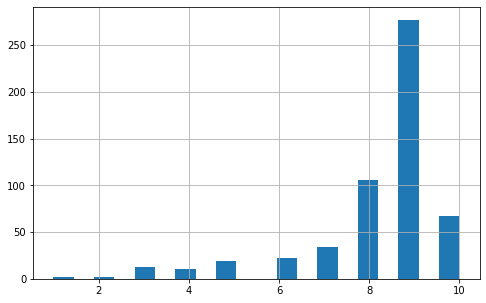

In [39]:
#histogram
plt.figure(figsize=(8,5))
df['Apgar1'].hist(bins=20)

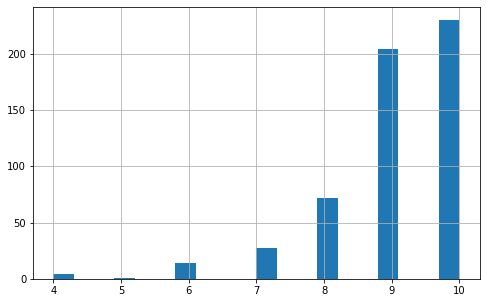

In [40]:
#histogram
plt.figure(figsize=(8,5))
df['Apgar5'].hist(bins=20)

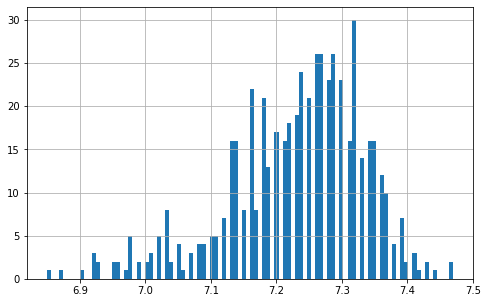

In [42]:
#histogram
plt.figure(figsize=(8,5))
df['pH'].hist(bins=100)

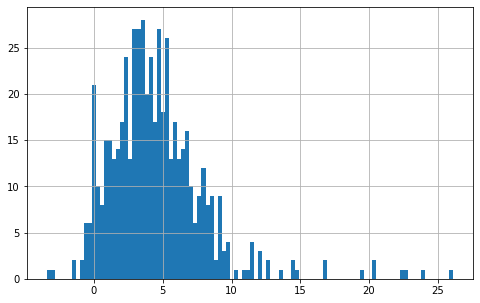

In [43]:
#histogram
plt.figure(figsize=(8,5))
df['BDecf'].hist(bins=100)

In [44]:
df['Deliv. type'].describe()

count    552.000000
mean       1.083333
std        0.276636
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: Deliv. type, dtype: float64

Create lables based on Apgar, pH and BDecf

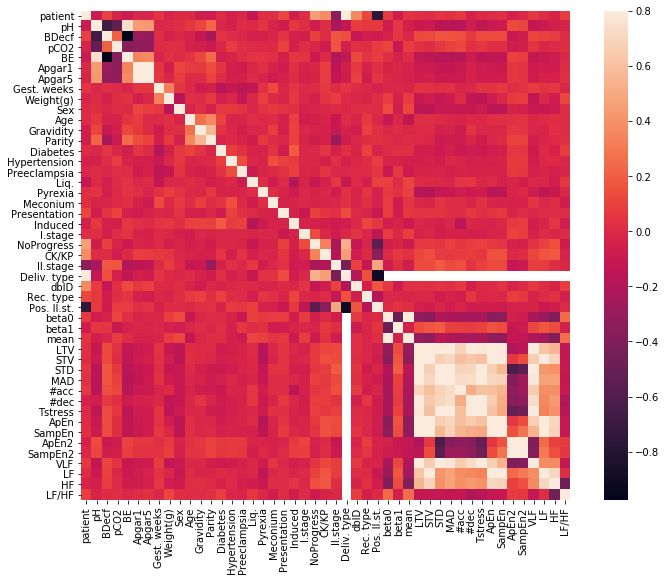

In [45]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [46]:
# for pH remove related output vars
exclude = ['BE', 'BDecf', 'pCO2', 'Apgar1', 'Apgar5', 'dbID', 'patient', 'Deliv. type']
df2 = df.drop(exclude, axis=1)

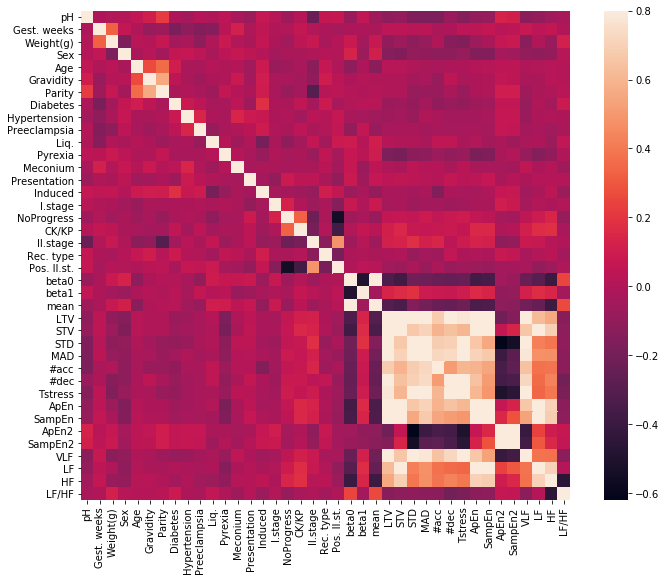

In [47]:
#correlation matrix
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [50]:
# for Apgars remove related output vars
exclude = ['BE', 'BDecf', 'pCO2', 'pH', 'dbID', 'patient', 'Deliv. type']
df3 = df.drop(exclude, axis=1)

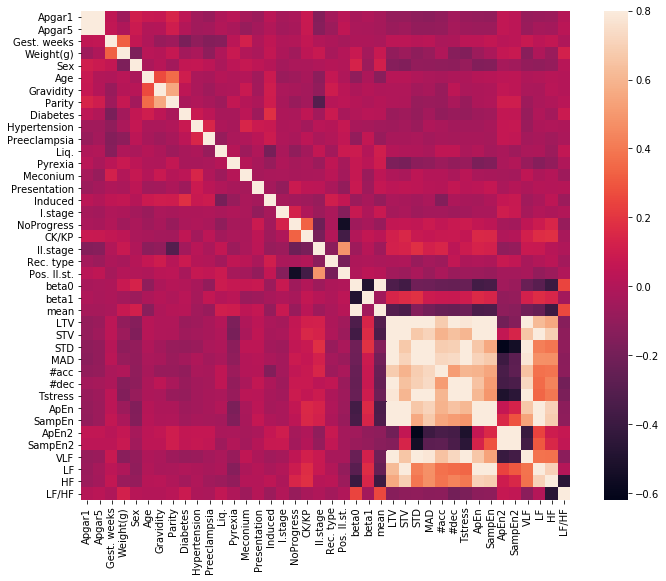

In [51]:
#correlation matrix
corrmat = df3.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [73]:
select = ['pH', 'BDecf', 'Apgar1', 'Age', 'Gravidity', 'Parity',
       'Induced', 'NoProgress', 'II.stage', 'beta0',
       'beta1', 'mean', 'LTV', 'STV', 'STD', 'MAD', '#acc', '#dec', 'Tstress',
       'ApEn', 'SampEn', 'VLF', 'LF', 'HF', 'LF/HF']

In [74]:
df4 = df[select]

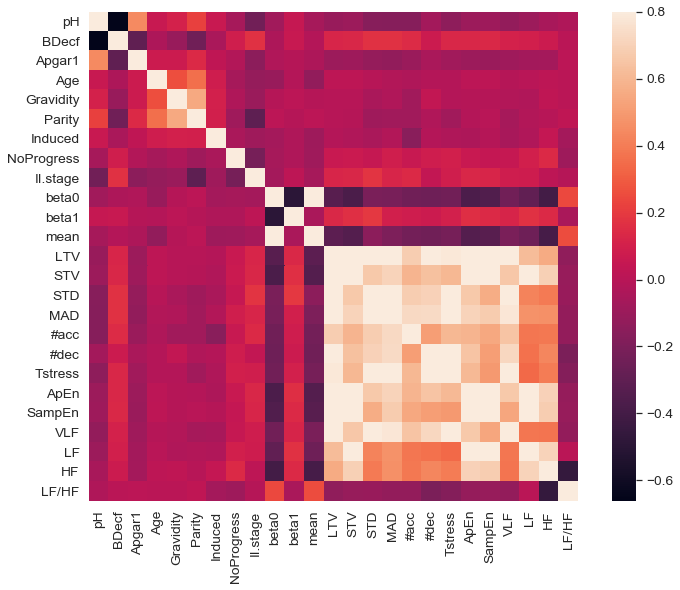

In [75]:
#correlation matrix
corrmat = df4.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
plt.figure(figsize=(10,10))
k = 10 #number of variables for heatmap
corrmat = df.corr()
cols = abs(corrmat).nlargest(k, 'Apgar1')['Apgar1'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
k = 15 #number of variables for heatmap
corrmat = df.corr()
cols = abs(corrmat).nlargest(k, 'pH')['pH'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()